In [1]:
#!pip install nb_black
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import sqlite3
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#!pip install category_encoders
import pandas as pd
from sqlite3 import OperationalError
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    RandomForestRegressor,
)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
import math
import plotly.express as px
from sklearn.metrics import mean_absolute_error

<IPython.core.display.Javascript object>

In [3]:
# with sqlite3.connect("switrs.sqlite") as par:
#     query = """SELECT *
#             FROM parties
#             INNER JOIN collisions ON collisions.case_id=parties.case_id
#             JOIN victims ON collisions.case_id=victims.case_id
#             WHERE collisions.collision_date >= '2020-01-01'
# """
#     # Construct a Dataframe from the results
#     Data = pd.read_sql_query(query, par)

<IPython.core.display.Javascript object>

In [4]:
# Data.to_csv("Capston2.csv", index=False)

<IPython.core.display.Javascript object>

In [5]:
Data = pd.read_csv("Capston2.csv")

C:\Users\lgssh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13,14,15,16,52,55,56,58,60,67,98,99,108,112,115) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<IPython.core.display.Javascript object>

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352091 entries, 0 to 352090
Columns: 116 entries, id to victim_ejected
dtypes: float64(25), int64(29), object(62)
memory usage: 311.6+ MB


<IPython.core.display.Javascript object>

In [7]:
test3 = Data.isna().sum() / len(Data)

<IPython.core.display.Javascript object>

In [8]:
test3

id                           0.000000
case_id                      0.000000
party_number                 0.000000
party_type                   0.000912
at_fault                     0.000000
                               ...   
victim_degree_of_injury      0.000111
victim_seating_position      0.030322
victim_safety_equipment_1    0.065313
victim_safety_equipment_2    0.080118
victim_ejected               0.035499
Length: 116, dtype: float64

<IPython.core.display.Javascript object>

In [9]:
Drop = list(test3[test3 > 0.5].index)

<IPython.core.display.Javascript object>

In [10]:
Drop

['party_drug_physical',
 'hazardous_materials',
 'school_bus_related',
 'oaf_violation_code',
 'oaf_violation_category',
 'oaf_violation_section',
 'oaf_violation_suffix',
 'other_associate_factor_2',
 'chp_vehicle_type_towed',
 'reporting_district',
 'city_division_lapd',
 'weather_2',
 'caltrans_county',
 'caltrans_district',
 'state_route',
 'route_suffix',
 'postmile_prefix',
 'postmile',
 'location_type',
 'ramp_intersection',
 'side_of_highway',
 'pcf_violation_code',
 'pcf_violation_subsection',
 'road_condition_2',
 'pedestrian_collision',
 'bicycle_collision',
 'motorcycle_collision',
 'truck_collision',
 'alcohol_involved',
 'primary_ramp',
 'secondary_ramp']

<IPython.core.display.Javascript object>

In [11]:
Data.drop(
    columns=[
        "hazardous_materials",
        "school_bus_related",
        "oaf_violation_code",
        "oaf_violation_category",
        "oaf_violation_section",
        "oaf_violation_suffix",
        "other_associate_factor_2",
        "chp_vehicle_type_towed",
        "reporting_district",
        "city_division_lapd",
        "weather_2",
        "caltrans_county",
        "caltrans_district",
        "state_route",
        "route_suffix",
        "postmile_prefix",
        "postmile",
        "location_type",
        "ramp_intersection",
        "side_of_highway",
        "pcf_violation_code",
        "pcf_violation_subsection",
        "road_condition_2",
        "pedestrian_collision",
        "bicycle_collision",
        "motorcycle_collision",
        "truck_collision",
        "alcohol_involved",
        "primary_ramp",
        "secondary_ramp",
    ],
    inplace=True,
)

<IPython.core.display.Javascript object>

In [12]:
Data

,id,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,direction_of_travel,...,case_id.2,party_number.1,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected
0,6679822,81158292,1,driver,1,female,48.0,B,NaN,S,...,81158292,1,1,female,48.0,7,1,L,G,0
1,6679825,81158297,1,driver,1,NaN,NaN,G,G,E,...,81158297,2,1,female,43.0,7,1,M,G,0
2,6679825,81158297,1,driver,1,NaN,NaN,G,G,E,...,81158297,2,2,female,14.0,7,3,M,G,0
3,6679826,81158297,2,driver,0,female,43.0,A,NaN,N,...,81158297,2,1,female,43.0,7,1,M,G,0
4,6679826,81158297,2,driver,0,female,43.0,A,NaN,N,...,81158297,2,2,female,14.0,7,3,M,G,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352086,10890889,9169359,2,driver,0,female,24.0,A,NaN,N,...,9169359,1,1,female,24.0,other visible injury,1,L,G,0
352087,10890889,9169359,2,driver,0,female,24.0,A,NaN,N,...,9169359,2,2,male,17.0,complaint of pain,3,L,G,0
352088,10890890,9169360,1,driver,1,male,28.0,A,NaN,E,...,9169360,1,1,male,28.0,complaint of pain,1,L,NaN,0
352089,10890891,9169360,2,parked vehicle,0,NaN,NaN,NaN,NaN,NaN,...,9169360,1,1,male,28.0,complaint of pain,1,L,NaN,0


<IPython.core.display.Javascript object>

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352091 entries, 0 to 352090
Data columns (total 86 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               352091 non-null  int64  
 1   case_id                          352091 non-null  int64  
 2   party_number                     352091 non-null  int64  
 3   party_type                       351770 non-null  object 
 4   at_fault                         352091 non-null  int64  
 5   party_sex                        323541 non-null  object 
 6   party_age                        319585 non-null  float64
 7   party_sobriety                   340688 non-null  object 
 8   party_drug_physical              45428 non-null   object 
 9   direction_of_travel              342701 non-null  object 
 10  party_safety_equipment_1         303987 non-null  object 
 11  party_safety_equipment_2         299269 non-null  object 
 12  fi

<IPython.core.display.Javascript object>

collision_severity:
* 1 - Fatal
* 2 - Injury (Severe)
* 3 - Injury (Other Visible)
* 4 - Injury (Complaint of Pain)
* 5 – Property Damage Only (PDO) (PDO collisions not included on TIMS)

In [14]:
Data["collision_severity"].value_counts()

pain                    180780
other injury            103167
property damage only     34387
severe injury            27430
fatal                     6213
M                            2
Name: collision_severity, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
Data = Data[Data["collision_severity"] != "M"]

<IPython.core.display.Javascript object>

In [16]:
severity_map = {
    "pain": 2,
    "other injury": 3,
    "property damage only": 1,
    "severe injury": 4,
    "fatal": 5,
}
Data["collision_severity"] = Data["collision_severity"].replace(severity_map)

<ipython-input-16-7c7626612f2d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["collision_severity"] = Data["collision_severity"].replace(severity_map)


<IPython.core.display.Javascript object>

In [17]:
Data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,352089.0,10189600.10,867998.97,6679822.00,9742679.00,10611016.00,10767609.00,10890892.00
case_id,352089.0,42583756.02,40134903.72,8845643.00,9079655.00,9136897.00,91221098.00,91329841.00
party_number,352089.0,1.71,0.85,1.00,1.00,2.00,2.00,11.00
at_fault,352089.0,0.45,0.50,0.00,0.00,0.00,1.00,1.00
party_age,319584.0,39.45,16.41,0.00,26.00,36.00,51.00,122.00
party_number_killed,352089.0,0.01,0.11,0.00,0.00,0.00,0.00,4.00
party_number_injured,352089.0,0.77,0.89,0.00,0.00,1.00,1.00,18.00
vehicle_year,325016.0,2010.01,12.40,12.00,2005.00,2012.00,2016.00,2918.00
chp_vehicle_type_towing,327639.0,7.47,12.79,1.00,1.00,1.00,7.00,98.00
case_id.1,352089.0,42583756.02,40134903.72,8845643.00,9079655.00,9136897.00,91221098.00,91329841.00


<IPython.core.display.Javascript object>

In [18]:
Data[Data["party_age"] == 0]

,id,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,direction_of_travel,...,case_id.2,party_number.1,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected
1178,6689710,81198955,1,driver,1,male,0.0,A,NaN,E,...,81198955,1,2,female,22.0,7,3,M,G,0
1179,6689710,81198955,1,driver,1,male,0.0,A,NaN,E,...,81198955,1,2,female,21.0,7,6,M,G,0
5518,6714388,81292010,2,bicyclist,0,male,0.0,G,G,S,...,81292010,2,4,male,0.0,severe injury,9,NaN,V,1
5848,6715914,81297309,2,driver,0,male,0.0,A,NaN,W,...,81297309,3,2,male,17.0,7,2,L,G,0
5849,6715914,81297309,2,driver,0,male,0.0,A,NaN,W,...,81297309,3,2,male,16.0,7,3,M,G,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343356,10881546,9151002,1,driver,1,female,0.0,A,NaN,S,...,9151002,1,2,female,20.0,complaint of pain,3,L,G,0
343357,10881546,9151002,1,driver,1,female,0.0,A,NaN,S,...,9151002,1,2,male,20.0,complaint of pain,6,L,G,0
343358,10881546,9151002,1,driver,1,female,0.0,A,NaN,S,...,9151002,2,1,female,20.0,complaint of pain,1,L,G,0
344903,10883017,9153072,1,driver,1,female,0.0,A,NaN,W,...,9153072,1,2,NaN,25.0,no injury,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [19]:
Data.drop(Data[Data['party_age']==0].index, inplace=True)


C:\Users\lgssh\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<IPython.core.display.Javascript object>

In [20]:
Data["party_drug_physical"].fillna("NA").value_counts()

NA    306569
G      21596
H      18630
E       2655
I       1969
F        554
Name: party_drug_physical, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
Data[Data["party_drug_physical"].isna()].head()

,id,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,direction_of_travel,...,case_id.2,party_number.1,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected
0,6679822,81158292,1,driver,1,female,48.0,B,NaN,S,...,81158292,1,1,female,48.0,7,1,L,G,0
3,6679826,81158297,2,driver,0,female,43.0,A,NaN,N,...,81158297,2,1,female,43.0,7,1,M,G,0
4,6679826,81158297,2,driver,0,female,43.0,A,NaN,N,...,81158297,2,2,female,14.0,7,3,M,G,0
5,6680036,81159169,1,driver,0,male,64.0,A,NaN,S,...,81159169,2,1,female,38.0,7,1,L,G,0
6,6680037,81159169,2,driver,0,female,38.0,A,NaN,N,...,81159169,2,1,female,38.0,7,1,L,G,0


<IPython.core.display.Javascript object>

In [22]:
pd.crosstab(
    Data["party_drug_physical"].fillna("sober"), Data["party_sobriety"], dropna=False
)

party_sobriety,A,B,C,D,G,H
party_drug_physical,,,,,,
E,89,473,14,4,0,0
F,179,7,7,2,0,0
G,0,0,0,0,21596,0
H,0,0,0,0,0,18630
I,1144,56,39,2,0,0
sober,278605,14686,3087,1957,0,0


<IPython.core.display.Javascript object>

In [23]:
Data["secondary_road"]

0         QUAIL CREEK RD
1              HARRIS RD
2              HARRIS RD
3              HARRIS RD
4              HARRIS RD
               ...      
352086        VENTURA RD
352087        VENTURA RD
352088       GATESIDE CT
352089       GATESIDE CT
352090       GATESIDE CT
Name: secondary_road, Length: 351973, dtype: object

<IPython.core.display.Javascript object>

In [24]:
Data["party_drug_physical"] = Data["party_drug_physical"].fillna("sober")

<ipython-input-24-7ff467cbf3f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["party_drug_physical"] = Data["party_drug_physical"].fillna("sober")


<IPython.core.display.Javascript object>

In [25]:
Data["jurisdiction"].value_counts()

1942.0    44379
1900.0    13036
3711.0     6239
3300.0     6193
1941.0     5598
          ...  
5401.0        2
2117.0        2
1205.0        2
300.0         2
602.0         1
Name: jurisdiction, Length: 423, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
Data["victim_role"].unique()

array([1, 2, 3, 4, 5, nan, '1', '3', '4', '2', '5', 'l', 'm'],
      dtype=object)

<IPython.core.display.Javascript object>

In [27]:
Data["victim_role"] = Data["victim_role"].replace(
    {1: "1", 2: "2", 3: "3", 4: "4", 5: "5"}
)

<ipython-input-27-a134e2ca5636>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["victim_role"] = Data["victim_role"].replace(


<IPython.core.display.Javascript object>

In [28]:
Data["victim_role"].unique()

array(['1', '2', '3', '4', '5', nan, 'l', 'm'], dtype=object)

<IPython.core.display.Javascript object>

In [29]:
Data["victim_role"].value_counts()

1    185008
2    142129
3     14228
4      9474
5      1102
m         3
l         1
Name: victim_role, dtype: int64

<IPython.core.display.Javascript object>

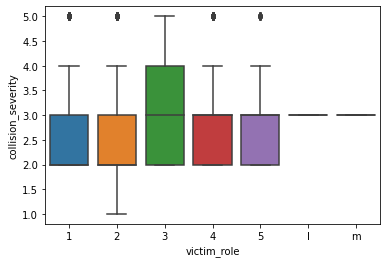

<IPython.core.display.Javascript object>

In [30]:
sns.boxplot(Data["victim_role"], Data["collision_severity"])

In [31]:
Data = Data[Data["victim_role"] != "l"]
Data = Data[Data["victim_role"] != "m"]

<IPython.core.display.Javascript object>

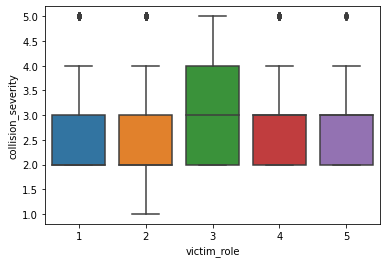

<IPython.core.display.Javascript object>

In [32]:
sns.boxplot(Data["victim_role"], Data["collision_severity"])

In [33]:
Data = Data[Data["type_of_collision"] != "N"]

<IPython.core.display.Javascript object>

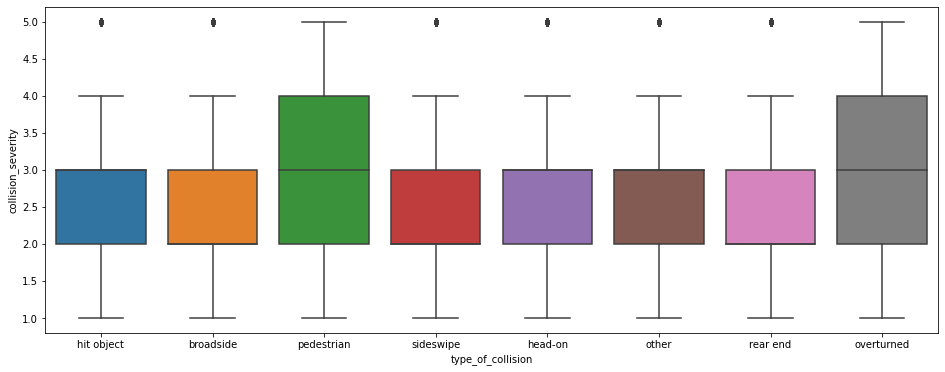

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(16, 6))
sns.boxplot(Data["type_of_collision"], Data["collision_severity"])

<!-- Victim Safety Equipment 1	VICTIM_SAFETY_EQUIP_1		
A - None in Vehicle
B - Unknown
C - Lap Belt Used
D - Lap Belt Not Used
E - Shoulder Harness Used
F - Shoulder Harness Not Used
G - Lap/Shoulder Harness Used
H - Lap/Shoulder Harness Not Used
J - Passive Restraint Used
K - Passive Restraint Not Used
L - Air Bag Deployed
M - Air Bag Not Deployed
N - Other
P - Not Required
Q - Child Restraint in Vehicle Used
R - Child Restraint in Vehicle Not Used
S - Child Restraint in Vehicle, Use Unknown
T - Child Restraint in Vehicle, Improper Use
U - No Child Restraint in Vehicle
V - Driver, Motorcycle Helmet Not Used
W - Driver, Motorcycle Helmet Used
X - Passenger, Motorcycle Helmet Not Used
Y - Passenger, Motorcycle Helmet Used
- or blank - Not Stated -->

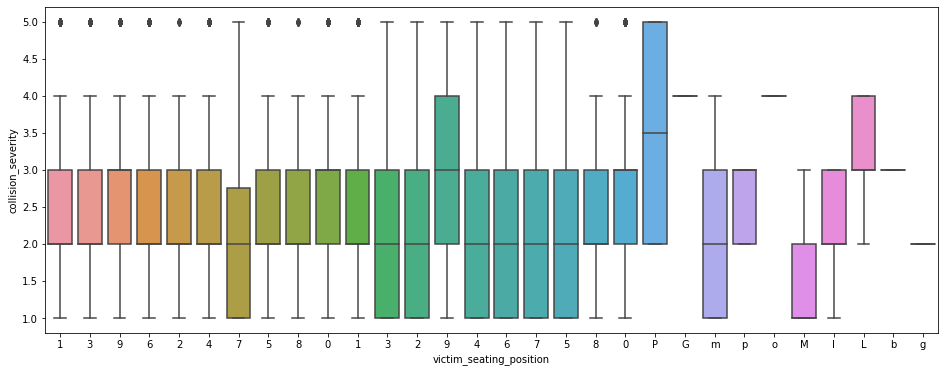

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(16, 6))
sns.boxplot(Data["victim_seating_position"], Data["collision_severity"])

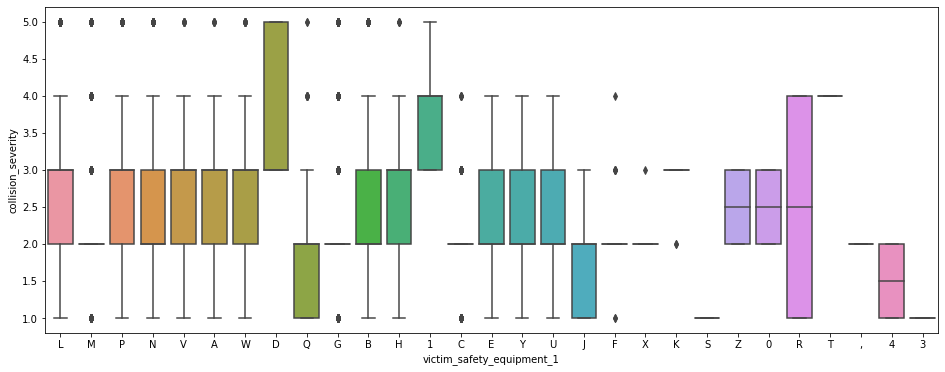

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(16, 6))
sns.boxplot(Data["victim_safety_equipment_1"], Data["collision_severity"])

In [37]:
Data["victim_safety_equipment_1"].value_counts()

M    167573
L    119332
P     31295
G      5625
N      1459
B      1219
V       464
W       458
Q       366
Y       307
A       220
C       193
H       159
E       113
J        62
F        37
U        33
X        15
D        14
1        13
K        10
0         8
S         5
4         4
Z         4
R         4
,         3
T         2
3         1
Name: victim_safety_equipment_1, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
s = Data[Data["victim_safety_equipment_1"].isna()]
s["victim_safety_equipment_1"]

7         NaN
8         NaN
10        NaN
11        NaN
12        NaN
         ... 
352017    NaN
352072    NaN
352073    NaN
352078    NaN
352081    NaN
Name: victim_safety_equipment_1, Length: 22967, dtype: object

<IPython.core.display.Javascript object>

In [39]:
D = [",", "T", "3", "0", "1", 0, 1, 3]
Data = Data[~Data["victim_safety_equipment_1"].isin(D)]
Data["victim_safety_equipment_1"] = Data["victim_safety_equipment_1"].fillna("Blank")

<IPython.core.display.Javascript object>

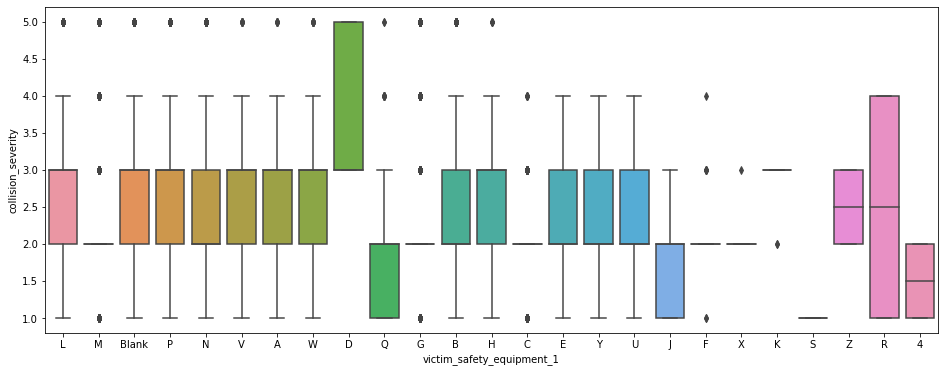

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(16, 6))
sns.boxplot(Data["victim_safety_equipment_1"], Data["collision_severity"])

Primary Rd	PRIMARY_RD	The road the collision occurred on

In [41]:
Data["primary_road"].unique()

array(['NORRIS RD', 'GOSFORD RD', 'FIRST ST', ..., 'LOS ABITOS BL',
       'WESTAR DR', 'VENTURA RD FRONTAGE RD'], dtype=object)

<IPython.core.display.Javascript object>

In [42]:
# sns.boxplot(Data["primary_road"], Data["collision_severity"])

<IPython.core.display.Javascript object>

Secondary Rd	SECONDARY_RD	A secondary reference road that DISTANCE and DIRECT are measured from

In [43]:
# sns.boxplot(Data["secondary_road"], Data["collision_severity"])

<IPython.core.display.Javascript object>

In [44]:
Prd_df = Data.groupby("primary_road").agg({"collision_severity": ["mean", "count"]})
Prd_df.columns = ["avg_severity", "count"]
Prd_df = Prd_df[Prd_df["count"] > 100]
Prd_df.sort_values("avg_severity", ascending=False)

,avg_severity,count
primary_road,,
INTERSTATE 5 SOUTHBOUND,3.421965,173
SR-39 (SAN GABRIEL CANYON RD.),3.398230,113
US-395,3.382979,141
SR-4,3.329341,167
GENEVA AV,3.304348,161
...,...,...
INTERNATIONAL BL,1.780769,260
WALNUT AV,1.731544,149
WILSON WY,1.710744,121


<IPython.core.display.Javascript object>

Secondary Rd:	A secondary reference road that DISTANCE and DIRECT are measured from	

In [48]:
Data["secondary_road"].unique()

array(['QUAIL CREEK RD', 'HARRIS RD', 'SIERRA AVE', ..., 'VANGUARD DR',
       'EMERSON RD', 'GATESIDE CT'], dtype=object)

<IPython.core.display.Javascript object>

In [50]:
Srd_df = Data.groupby("secondary_road").agg({"collision_severity": ["mean", "count"]})
Srd_df.columns = ["avg_severity", "count"]
Srd_df = Prd_df[Prd_df["count"] > 100]
Srd_df.sort_values("avg_severity", ascending=False)

,avg_severity,count
secondary_road,,
FRANCISQUITO AVE,4.379747,158
LAKEWOOD BOULEVARD,3.227941,136
ROXFORD ST,2.950820,183
VAN NESS AV,2.926966,178
TYLER ST,2.898734,158
...,...,...
OLIVE AV,1.829268,123
BANCROFT AV,1.771930,114
CITRUS AV,1.767123,146


<IPython.core.display.Javascript object>

In [51]:
Data = LeaveOneOutEncoder().fit_transform(Data, Data["collision_severity"])

<IPython.core.display.Javascript object>

In [60]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351938 entries, 0 to 352090
Data columns (total 73 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               351938 non-null  int64  
 1   party_number                     351938 non-null  int64  
 2   party_type                       351826 non-null  float64
 3   at_fault                         351938 non-null  int64  
 4   party_sex                        351826 non-null  float64
 5   party_age                        319434 non-null  float64
 6   party_sobriety                   351826 non-null  float64
 7   party_drug_physical              351826 non-null  float64
 8   direction_of_travel              351826 non-null  float64
 9   party_safety_equipment_1         351826 non-null  float64
 10  party_safety_equipment_2         351826 non-null  float64
 11  financial_responsibility         351826 non-null  float64
 12  ce

<IPython.core.display.Javascript object>

In [61]:
Data = Data.drop(
    columns=[
        "beat_number",
        "jurisdiction",
        "party_number_injured",
        "case_id",
        "case_id.2",
        "case_id.1",
        "party_number_killed",
        "injured_victims",
        "killed_victims",
        "other_visible_injury_count",
        "officer_id",
        "severe_injury_count",
        "victim_degree_of_injury",
    ]
)

KeyError: "['beat_number' 'jurisdiction' 'party_number_injured' 'case_id' 'case_id.2'\n 'case_id.1' 'party_number_killed' 'injured_victims' 'killed_victims'\n 'other_visible_injury_count' 'officer_id' 'severe_injury_count'\n 'victim_degree_of_injury'] not found in axis"

<IPython.core.display.Javascript object>

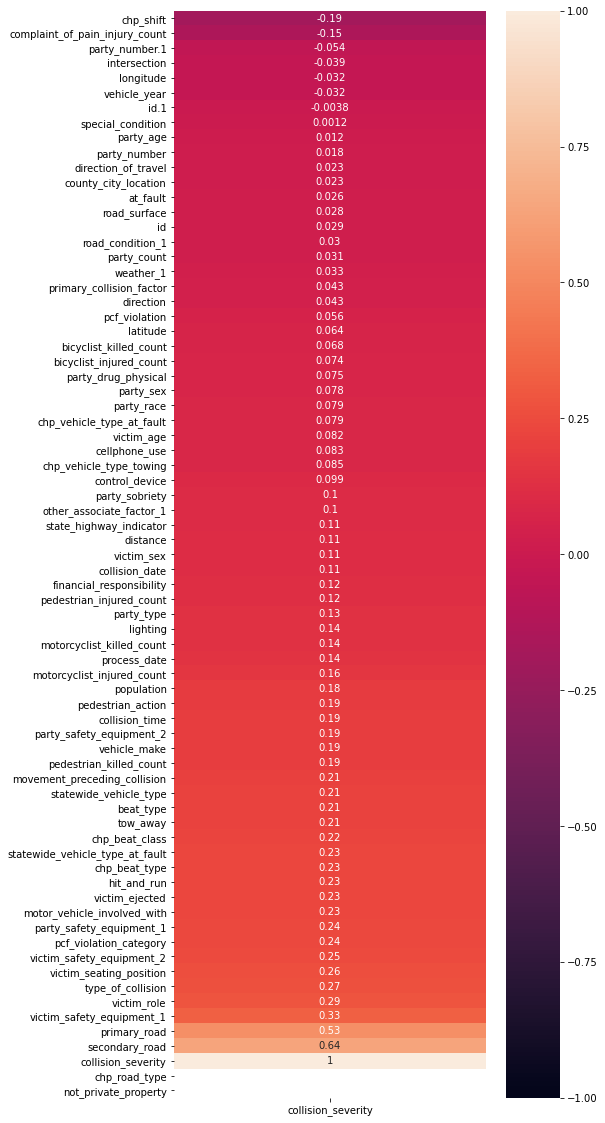

<IPython.core.display.Javascript object>

In [62]:
CollisionCor = Data.corr()[["collision_severity"]].sort_values("collision_severity")
plt.figure(figsize=(7, 20))
sns.heatmap(
    CollisionCor,
    vmin=-1,
    annot=True,
)
plt.show()

Columns with correlation more than 0.25 has been chosen.

In [63]:
CollisionCor

,collision_severity
chp_shift,-0.190924
complaint_of_pain_injury_count,-0.146206
party_number.1,-0.054371
intersection,-0.038534
longitude,-0.032082
...,...
primary_road,0.534842
secondary_road,0.635123
collision_severity,1.000000
chp_road_type,NaN


<IPython.core.display.Javascript object>

In [64]:
CollisionCor = CollisionCor[np.abs(CollisionCor["collision_severity"]) > 0.25]

<IPython.core.display.Javascript object>

In [65]:
CollisionCor

,collision_severity
victim_seating_position,0.261927
type_of_collision,0.269200
victim_role,0.288611
victim_safety_equipment_1,0.328795
primary_road,0.534842
secondary_road,0.635123
collision_severity,1.000000


<IPython.core.display.Javascript object>

In [66]:
df1 = Data[CollisionCor.index]
df1

,victim_seating_position,type_of_collision,victim_role,victim_safety_equipment_1,primary_road,secondary_road,collision_severity
0,2.552385,2.737980,2.543005,2.624793,3.000000,4.000000,2.0
1,2.552385,2.395802,2.543005,2.137051,2.255319,2.000000,2.0
2,2.200123,2.395802,2.135458,2.137051,2.255319,2.000000,2.0
3,2.552385,2.395802,2.543005,2.137051,2.255319,2.000000,2.0
4,2.200123,2.395802,2.135458,2.137051,2.255319,2.000000,2.0
...,...,...,...,...,...,...,...
352086,2.550008,2.395793,2.543000,2.624784,2.052632,1.979592,3.0
352087,2.094876,2.395793,2.135451,2.624784,2.052632,1.979592,3.0
352088,2.550017,2.395802,2.543005,2.624793,1.952381,2.000000,2.0
352089,2.550017,2.395802,2.543005,2.624793,1.952381,2.000000,2.0


<IPython.core.display.Javascript object>

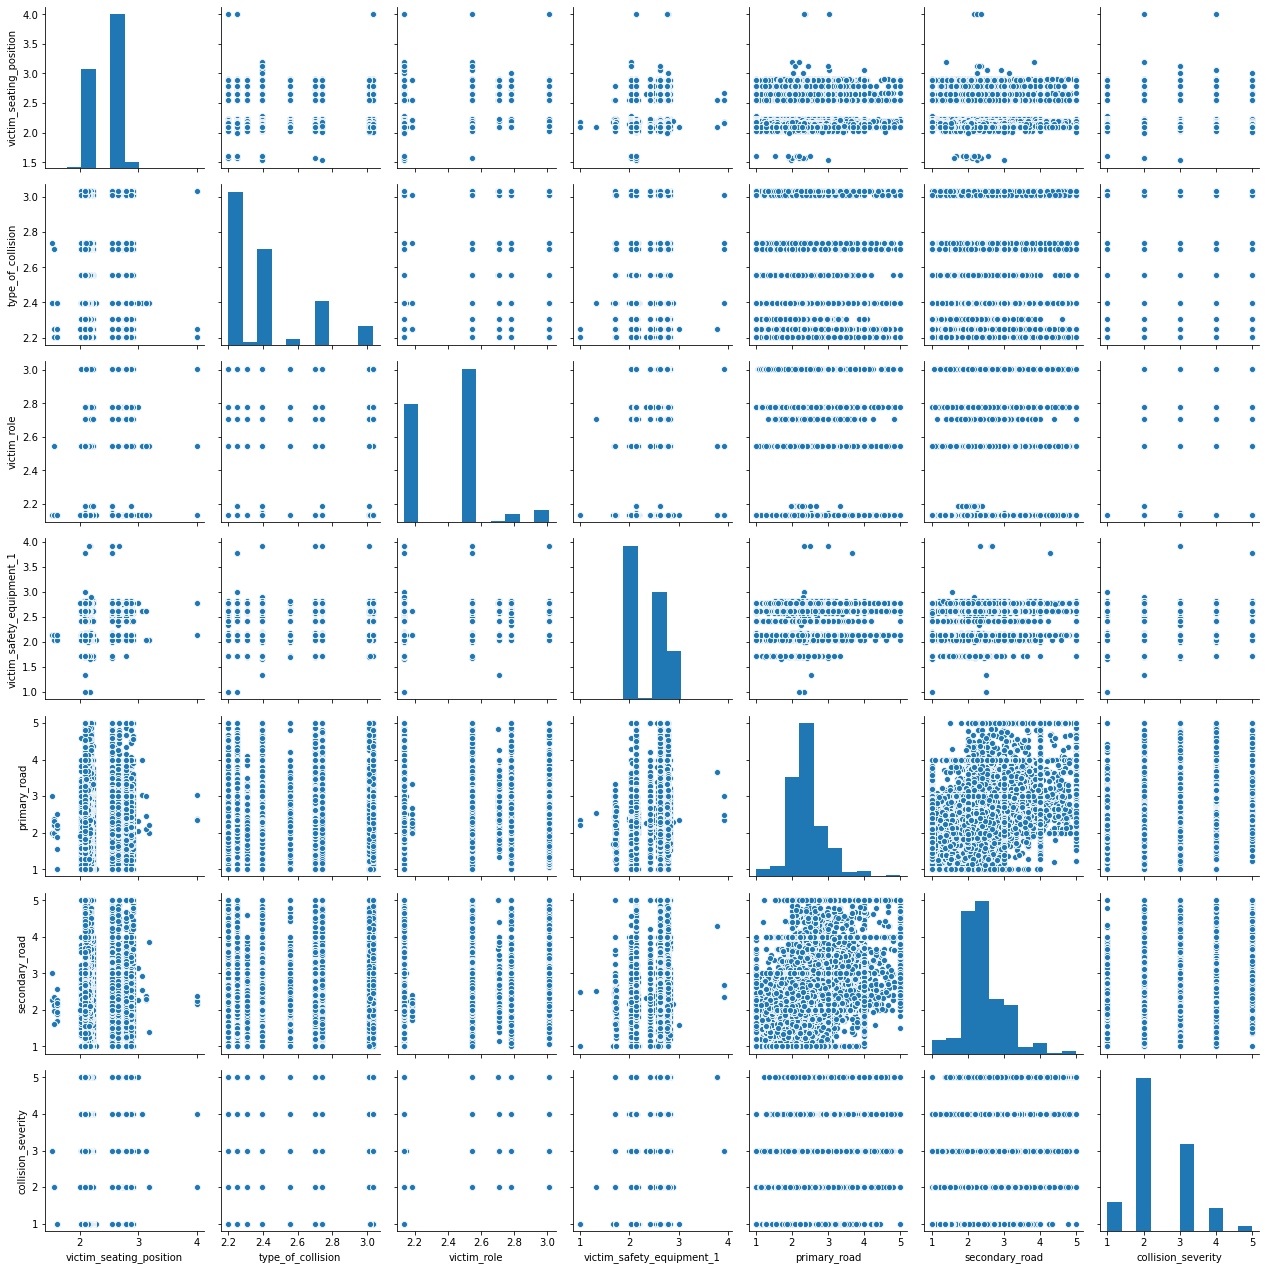

<IPython.core.display.Javascript object>

In [67]:
sns.pairplot(df1)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

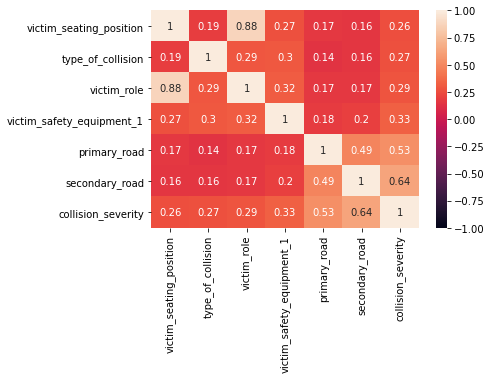

<IPython.core.display.Javascript object>

In [68]:
sns.heatmap(df1.corr(), vmin=-1, annot=True)
plt.show

That shows party_count and party_age are not very crucial features affecting killed_victims or injured_victims

1) Random Forest Classifier

In [69]:
df1 = df1.dropna()

<IPython.core.display.Javascript object>

In [70]:
df1

,victim_seating_position,type_of_collision,victim_role,victim_safety_equipment_1,primary_road,secondary_road,collision_severity
0,2.552385,2.737980,2.543005,2.624793,3.000000,4.000000,2.0
1,2.552385,2.395802,2.543005,2.137051,2.255319,2.000000,2.0
2,2.200123,2.395802,2.135458,2.137051,2.255319,2.000000,2.0
3,2.552385,2.395802,2.543005,2.137051,2.255319,2.000000,2.0
4,2.200123,2.395802,2.135458,2.137051,2.255319,2.000000,2.0
...,...,...,...,...,...,...,...
352086,2.550008,2.395793,2.543000,2.624784,2.052632,1.979592,3.0
352087,2.094876,2.395793,2.135451,2.624784,2.052632,1.979592,3.0
352088,2.550017,2.395802,2.543005,2.624793,1.952381,2.000000,2.0
352089,2.550017,2.395802,2.543005,2.624793,1.952381,2.000000,2.0


<IPython.core.display.Javascript object>

In [71]:
X = df1.drop(columns="collision_severity")
y = df1["collision_severity"]
X = StandardScaler().fit_transform(X)  # columnsns name go away
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Fit a random forest classifier to the data.

In [72]:
model = RandomForestRegressor(n_estimators=30, max_depth=3)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=30)

<IPython.core.display.Javascript object>

In [73]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.5497029377838132
test_score: 0.5527170221111571


<IPython.core.display.Javascript object>

In [74]:
# Bagging + Rand features done for us
model = RandomForestClassifier(n_estimators=30, max_depth=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

<IPython.core.display.Javascript object>

Print out the accuracy of the predictor on the training and test data.

In [75]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.8063419313579194
test_score: 0.807122758150243


<IPython.core.display.Javascript object>

In [76]:
y_pred = model.predict(X_test)
MeanAbsError = np.mean(np.abs((y_pred - y_test)))
MeanAbsError

0.24561578034846374

<IPython.core.display.Javascript object>

In [77]:
MAPE = np.mean(np.abs(np.divide((y_pred - y_test), y_test)))
MAPE

0.11531042454214953

<IPython.core.display.Javascript object>

In [78]:
ConMatrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=["property damage only", "pain", "other injury", "severe injury", "fatal"],
    index=["property damage only", "pain", "other injury", "severe injury", "fatal"],
)
ConMatrix.index.name = "Actual"
ConMatrix.columns.name = "Pred"
ConMatrix

Pred,property damage only,pain,other injury,severe injury,fatal
Actual,,,,,
property damage only,2455,4091,339,1,0
pain,0,35906,313,0,0
other injury,0,3250,17357,0,0
severe injury,35,1789,2567,1062,0
fatal,1,459,590,137,14


<IPython.core.display.Javascript object>

The model never predict any Fatal collision.

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.99      0.36      0.52      6886
         2.0       0.79      0.99      0.88     36219
         3.0       0.82      0.84      0.83     20607
         4.0       0.89      0.19      0.32      5453
         5.0       1.00      0.01      0.02      1201

    accuracy                           0.81     70366
   macro avg       0.90      0.48      0.52     70366
weighted avg       0.83      0.81      0.77     70366



<IPython.core.display.Javascript object>

In [80]:
y_test.value_counts(normalize=True)

2.0    0.514723
3.0    0.292855
1.0    0.097860
4.0    0.077495
5.0    0.017068
Name: collision_severity, dtype: float64

<IPython.core.display.Javascript object>

Importance for feature selection

In [81]:
# selector = SelectFromModel(RandomForestClassifier(), max_features=2)
# selector.fit(X_train, y_train)
# X_train.loc[:, selector.get_support()].head()

<IPython.core.display.Javascript object>

Tuning Random Forest

In [83]:
# grid = {
#     "n_estimators": [100, 200, 300],
#     "max_depth": [2, 3, 5],
#     "min_samples_leaf": [1, 50, 100],
# }
# model = GridSearchCV(RandomForestClassifier(), grid, cv=2, verbose=1, n_jobs=-1)
# model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [85]:
# model.best_params_

<IPython.core.display.Javascript object>

This is the best tree that has been chosen by the grid search

In [86]:
model = RandomForestClassifier(max_depth=5, min_samples_leaf=1, n_estimators=300)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=300)

<IPython.core.display.Javascript object>

In [87]:
y_pred = model.predict(X_test)
MeanAbsError = np.mean(np.abs((y_pred - y_test)))
MeanAbsError

0.05072051843219737

<IPython.core.display.Javascript object>

In [88]:
y_pred

array([4., 3., 1., ..., 2., 2., 3.])

<IPython.core.display.Javascript object>

In [89]:
ConMatrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=["property damage only", "pain", "other injury", "severe injury", "fatal"],
    index=["property damage only", "pain", "other injury", "severe injury", "fatal"],
)
ConMatrix.index.name = "Actual"
ConMatrix.columns.name = "Pred"
ConMatrix

Pred,property damage only,pain,other injury,severe injury,fatal
Actual,,,,,
property damage only,6819,28,29,10,0
pain,0,36178,25,16,0
other injury,0,665,19928,14,0
severe injury,63,352,545,4493,0
fatal,66,74,194,405,462


<IPython.core.display.Javascript object>

In [90]:
model.score(X_train, y_train)

0.9646983585589427

<IPython.core.display.Javascript object>

In [91]:
model.score(X_test, y_test)

0.9646704374271665

<IPython.core.display.Javascript object>

In [92]:
# best_model = model.best_estimator_
model.feature_importances_

array([0.14347272, 0.0148575 , 0.4495597 , 0.24141049, 0.03493254,
       0.11576705])

<IPython.core.display.Javascript object>

In [93]:
importance_df = pd.DataFrame(
    {
        "feat": df1.drop(columns="collision_severity").columns,
        "importance": model.feature_importances_,
    }
)
importance_df.sort_values("importance", ascending=False)

,feat,importance
2,victim_role,0.449560
3,victim_safety_equipment_1,0.241410
0,victim_seating_position,0.143473
5,secondary_road,0.115767
4,primary_road,0.034933
1,type_of_collision,0.014857


<IPython.core.display.Javascript object>

2) Logistic Regression

In [94]:
grid = {"C": [10, 100, 1000, 10000, 100000], "multi_class": ["ovr", "multinomial"]}

model = GridSearchCV(LogisticRegression(), grid, cv=2, verbose=1, n_jobs=-1)
model.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.7s finished
C:\Users\lgssh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 10000, 100000],
                         'multi_class': ['ovr', 'multinomial']},
             verbose=1)

<IPython.core.display.Javascript object>

In [95]:
y_pred = model.predict(X_test)
MeanAbsError = np.mean(np.abs((y_pred - y_test)))
MeanAbsError

0.3405195691100816

<IPython.core.display.Javascript object>

In [96]:
model.best_params_

{'C': 1000, 'multi_class': 'multinomial'}

<IPython.core.display.Javascript object>

In [97]:
model.score(X_train, y_train)

0.6853975698145385

<IPython.core.display.Javascript object>

In [98]:
model.score(X_test, y_test)

0.6872637353267202

<IPython.core.display.Javascript object>

In [99]:
ConMat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=["property damage only", "pain", "other injury", "severe injury", "fatal"],
    index=["property damage only", "pain", "other injury", "severe injury", "fatal"],
)
ConMat.index.name = "Actual"
ConMat.columns.name = "Pred"
ConMat

Pred,property damage only,pain,other injury,severe injury,fatal
Actual,,,,,
property damage only,3701,3013,170,2,0
pain,815,31109,4189,102,4
other injury,56,8668,11549,327,7
severe injury,3,1026,2703,1668,53
fatal,0,106,364,398,333


<IPython.core.display.Javascript object>

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.81      0.54      0.65      6886
         2.0       0.71      0.86      0.78     36219
         3.0       0.61      0.56      0.58     20607
         4.0       0.67      0.31      0.42      5453
         5.0       0.84      0.28      0.42      1201

    accuracy                           0.69     70366
   macro avg       0.73      0.51      0.57     70366
weighted avg       0.69      0.69      0.67     70366



<IPython.core.display.Javascript object>

In [101]:
model.best_estimator_.coef_

array([[ 1.75489171e-02, -3.61751397e-01, -4.67060814e+00,
        -6.24210444e-01, -1.49787873e+00, -2.19000770e+00],
       [ 6.55613537e-02, -2.99156108e-01,  1.09064932e+00,
        -2.91796809e-01, -4.72322183e-01, -9.70399147e-01],
       [ 2.29793914e-03, -9.39113156e-03,  1.12373882e+00,
         1.26147483e-01,  3.00318796e-01,  3.61993171e-01],
       [-2.34776735e-02,  2.02258889e-01,  1.17868650e+00,
         4.13754277e-01,  7.35951247e-01,  1.12329096e+00],
       [-6.19305366e-02,  4.68039747e-01,  1.27753350e+00,
         3.76105493e-01,  9.33930868e-01,  1.67512271e+00]])

<IPython.core.display.Javascript object>